In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geoplot as gplt
import geopandas as gpd

In [3]:
province = pd.read_csv('data/result/province_count.csv',index_col=[0])
city = pd.read_csv('data/result/city_count.csv',index_col=[0])

In [4]:
china=gpd.read_file('data/china_province_map/china_province_map.shp', encoding="utf-8")
china

,OWNER,geometry
0,Inner Mongolia,"POLYGON ((121.48938 53.33117, 121.49769 53.320..."
1,Heilongjiang,"POLYGON ((121.48938 53.33117, 121.49162 53.331..."
2,Jilin,"POLYGON ((123.17773 46.24767, 123.18046 46.248..."
3,Liaoning,"MULTIPOLYGON (((121.52385 38.81551, 121.52419 ..."
4,Gansu,"POLYGON ((97.17195 42.79342, 97.18481 42.77167..."
5,Ningxia,"MULTIPOLYGON (((106.05844 35.43237, 106.05807 ..."
6,Qinghai,"POLYGON ((92.40360 39.03967, 92.40493 39.04133..."
7,Shaanxi,"POLYGON ((111.11640 39.36374, 111.11701 39.363..."
8,Xinjiang,"POLYGON ((87.31262 49.10914, 87.31808 49.10807..."
9,Beijing,"POLYGON ((117.37974 40.22687, 117.38528 40.223..."


In [5]:
china['Chinese_name']=["内蒙古","黑龙江","吉林","辽宁","甘肃","宁夏","青海","陕西","新疆","北京","河北","山东","山西","天津","重庆","贵州","四川","西藏","广东","广西", "海南", "云南","河南","湖北","湖南","江西","安徽","福建","江苏","上海","浙江","台湾","香港","澳门"]
china.set_index('Chinese_name',inplace=True)

In [6]:
set(china.index)-set(province.index)

{'云南', '台湾', '澳门', '西藏', '香港', '黑龙江'}

### 要join，须有相同的index

In [7]:
new_row = pd.DataFrame.from_dict({'黑龙江': 0, '香港': 0,"澳门":0,'云南':0, '台湾':0,'西藏':0}, orient='index')
new_row.columns=['count']
province_all=pd.concat([province,new_row])
province_all

,count
北京,20
山东,19
内蒙古,18
浙江,17
河南,16
上海,14
四川,12
广东,11
河北,9
宁夏,8


In [8]:
china_geo_count = china.join(province_all)
china_geo_count.to_file('data/result/china_geo_count.geojson', driver='GeoJSON')

### 画图，省份的政策数量用面的颜色表示，城市的政策数量用点的颜色表示。

In [9]:
import geoplot.crs as gcrs

In [10]:
cities_coordination=pd.read_csv('data/geo/china_cities_coordination.csv')
cities_coordination

,省级行政区,城市,北纬,东经
0,北京,北京市,39.904690,116.40717
1,天津,天津市,39.085100,117.19937
2,上海,上海市,31.230370,121.47370
3,重庆,重庆市,29.564710,106.55073
4,香港特别行政区,九龙,22.327115,114.17495
...,...,...,...,...
346,新疆维吾尔自治区,喀什地区,39.470420,75.98976
347,新疆维吾尔自治区,和田地区,37.114310,79.92247
348,新疆维吾尔自治区,伊犁哈萨克自治州,43.916890,81.32416
349,新疆维吾尔自治区,塔城地区,46.745320,82.98046


In [11]:
#为了画点，为city提取经纬度
for i in city.index:
    for j in cities_coordination['城市']:
        if i in j:
            city.loc[i,'东经']=cities_coordination[cities_coordination['城市']==j]['东经'].values[0]
            city.loc[i,'北纬']=cities_coordination[cities_coordination['城市']==j]['北纬'].values[0]
city

,count,东经,北纬
北京,20,116.40717,39.90469
上海,14,121.47370,31.23037
深圳,6,114.05956,22.54286
青岛,6,120.38299,36.06623
佛山,5,113.12192,23.02185
...,...,...,...
厦门,1,118.08948,24.47951
海南,1,100.62037,36.28663
南通,1,120.89371,31.97958
中山,1,113.39260,22.51595


In [13]:
city_count_geo=gpd.GeoDataFrame(city,geometry=gpd.points_from_xy(city['东经'],city['北纬']))
city_count_geo.to_file('data/result/city_count_geo.geojson', driver='GeoJSON')

d:\conda\envs\geopy\lib\site-packages\mapclassify\classifiers.py:257: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


<GeoAxes: >

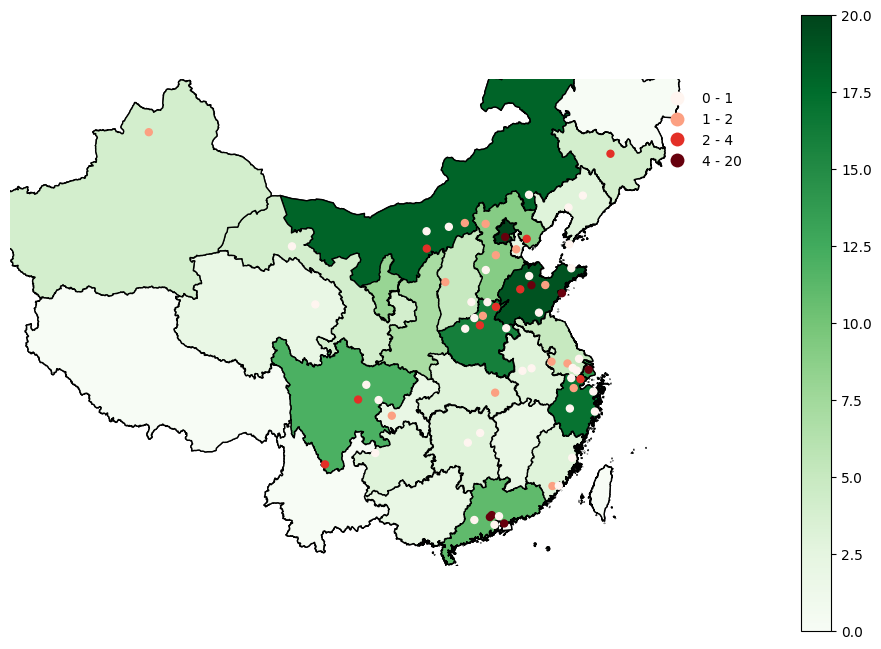

In [16]:
ax = gplt.polyplot(
    china_geo_count, projection=gcrs.AlbersEqualArea(),
    edgecolor='black', facecolor='lightgray',
    figsize=(12, 8)
)

gplt.choropleth(
    china_geo_count,ax=ax,hue='count', projection=gcrs.AlbersEqualArea(),
    edgecolor='black', linewidth=1,
    cmap='Greens', legend=True,
    # figsize=(1, 8),
    
    # legend_labels=[
    #     '<3 million', '3-6.7 million', '6.7-12.8 million',
    #     '12.8-25 million', '25-37 million']
    
)
# gplt.pointplot(
#     city_count_geo, ax=ax, hue='count', cmap='Reds',
#     scheme='quantiles',
#     # scale='count', limits=(5, 20), #the minimum and maximum size of the points.
#     legend=True, legend_var='hue', #legend=True，need a legend. legend_var: the variable to use when constructing the legend.
#     legend_kwargs={'frameon': False},
#     zorder=5  #legend_kwargs: keyword arguments passed to the underlying legend constructor. frameon=False, remove the frame of the legend.
#     # legend_values=[1, 2, 3, 5, 10], #legend_values: the values to use when constructing the legend. If None, the values will be inferred from the scale and limits.
#     # legend_labels=['1', '2', '3', '<6', '>10'] #legend_labels: the labels to use when constructing the legend. If None, the labels will be inferred from the legend_values.
# )
ax.set_title('Provincial Hydrogen Industry Policies Issued Since 2019.', fontsize=16)
plt.savefig("data/result/province_policy.pdf")

在梳理各地加氢站鼓励政策及补贴办法时发现共同点如下：
1. 补贴对建成时间有期限要求，不同期限内建成补贴不同，越晚建成补贴越少；
2. 对加强站有加氢能力要求，加氢能力不同补贴不同；
3. 各地均支持油气站增设加氢功能，鼓励现有加油、加气站点网络改扩建加氢设施；

氢能发展与各省的经济发展水平呈正相关，经济总量排名靠前的广东、江苏、山东、浙江、上海、天津、重庆等省份的氢能产业发展及加氢站设施鼓励政策出台较为为密集

In [56]:
df=pd.read_csv('data/crawler/url_title_content.csv',index_col=[0])
df

,url,title,content
0,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,绿氢制绿氨获得巨大空间！工信部公告《合成氨行业规范条件》,近日，工信部发布《合成氨行业规范条件》，从质量、技术和装备，节能降碳和资源综合利用，环境保护...
1,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,氢能应用空间再扩！生态环境部全面核查石化、钢铁等温室气体排放,通知要求，石化、化工、建材、钢铁、有色、造纸、民航等重点行业，年度温室气体排放量达2.6万吨...
2,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,推进海上风电制氢先导工程！上海将氢能列入新基建行动方案,10月19日，上海市政府印发《上海市进一步推进新型基础设施建设行动方案（2023-2026年...
3,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,氢能入列！国家能源局发布可再生能源发展试点示范通知,一共包括20个建设包括但不限于海上风电、海上光伏、海洋能、制氢（氨、甲醇）、储能等多种能源资...
4,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,国务院：壮大风光氢储产业集群，推动乌兰察布至燕山石化输氢管道建设,国务院10月16日发布《关于推动内蒙古高质量发展奋力书写中国式现代化新篇章的意见》，提出：推...
...,...,...,...
465,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,期待！广州一出手就定下了2000亿元的氢能产业发展目标,国际能源网/氢能汇记者获悉7月30日7月30日（以下简称《通知》）该《通知》从广州市氢能发展...
466,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,重磅！全国首个省级加氢站运营管理规范正式发布,7月24日，山东省市场监督管理局发布了关于《车用加氢站运营管理规范》等27项地方标准进行公示...
467,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,43个项目、总投资87亿元！河北2020第一批氢能重点项目清单出炉！,国际能源网讯 3月31日，河北省发改委印发《河北省2020年氢能产业实施重点项目清单（第一批...
468,http://mp.weixin.qq.com/s?__biz=Mzk0MDAwMDkzMA...,权威发布 | 国家能源局：公开征集“氢能产业发展及其技术装备创新支撑研究”课题承担人,日前其中，四项课题之一的“氢能产业发展及其技术装备创新支撑研究”方面，国家能源局要求的重点研...


In [57]:
df.to_excel('data/crawler/url_title_content.xlsx')

In [61]:
text = df[['title','content']]
with open('data/crawler/url_title_content.txt','w',encoding='utf-8') as f:
    f.write(text.to_string(index=None,header=None))

In [66]:
df[['title','content']].iloc[:2,:]

,title,content
0,绿氢制绿氨获得巨大空间！工信部公告《合成氨行业规范条件》,近日，工信部发布《合成氨行业规范条件》，从质量、技术和装备，节能降碳和资源综合利用，环境保护...
1,氢能应用空间再扩！生态环境部全面核查石化、钢铁等温室气体排放,通知要求，石化、化工、建材、钢铁、有色、造纸、民航等重点行业，年度温室气体排放量达2.6万吨...


In [72]:
#split the text into n parts
import os
def split_text(df,n):
    text_len=len(df)
    length=round(text_len/n)
    for i in range(n):
        text=df.iloc[length*i:length*(i+1),:]
        file_path='data/crawler/url_title_content'+str(i)+'.txt'
        with open(file_path,'w',encoding='utf-8') as f:
            f.write(text.to_string(index=None,header=None))
        
split_text(df[['title','content']],10)


In [86]:
#split the text into x MB parts
import os

def save_df_in_chunks(df, max_size_mb, file_prefix):
    # 将DataFrame转换为字符串，逐行处理
    df_str = df.to_csv(index=False)
    lines = df_str.split('\n')

    # 初始化变量
    chunk = ""
    file_index = 1
    max_size_bytes = max_size_mb * 1024 * 1024  # 转换MB到字节

    for line in lines:
        # 如果加上新行会超过大小限制，则保存当前块并开始新块
        if len((chunk + line).encode('utf-8')) > max_size_bytes:
            with open(os.path.join('data/crawler/', f'{file_prefix}_{file_index}.txt'), 'w', encoding='utf-8') as file:
                file.write(chunk)
                rows=chunk.count('\n')
                print(f'{file_prefix}_{file_index}.txt has {rows} lines') 
            file_index += 1
            chunk = line + '\n'
        else:
            chunk += line + '\n'

    # 保存最后一个块（如果有内容的话）
    if chunk.strip():
        with open(os.path.join('data/crawler/',f'{file_prefix}_{file_index}.txt'), 'w', encoding='utf-8') as file:
            file.write(chunk)
            rows=chunk.count('\n')
            print(f'{file_prefix}_{file_index}.txt has {rows} lines') 
# 调用函数来保存DataFrame
save_df_in_chunks(df[['title','content']], 1, 'data_chunk')  # 保存为data_chunk_1.txt, data_chunk_2.txt, ...

data_chunk_1.txt has 108 lines
data_chunk_2.txt has 74 lines
data_chunk_3.txt has 84 lines
data_chunk_4.txt has 82 lines
data_chunk_5.txt has 126 lines


In [84]:
182+166+126

474

In [81]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import os

def save_text_to_pdf(text, filename):
    c = canvas.Canvas(filename, pagesize=letter)
    text_object = c.beginText(40, 750)  # 设置开始位置
    text_object.setFont("Times-Roman", 12)

    # 将文本添加到PDF
    for line in text.split('\n'):
        text_object.textLine(line)

    c.drawText(text_object)
    c.save()

def save_df_in_chunks_to_pdf(df, max_size_mb, file_prefix, path='/data/crawler/'):
    df_str = df.to_csv(index=False)
    lines = df_str.split('\n')

    chunk = ""
    file_index = 1
    max_size_bytes = max_size_mb * 1024 * 1024

    for line in lines:
        if len((chunk + line).encode('utf-8')) > max_size_bytes:
            filename = os.path.join(path, f'{file_prefix}_{file_index}.pdf')
            save_text_to_pdf(chunk, filename)
            file_index += 1
            chunk = line + '\n'
        else:
            chunk += line + '\n'

    if chunk.strip():
        filename = os.path.join(output_folder, f'{file_prefix}_{file_index}.pdf')
        save_text_to_pdf(chunk, filename)

# 示例使用
# save_df_in_chunks_to_pdf(df, 2, 'data_chunk')


0